In [1]:
from bs4 import BeautifulSoup
import requests
import csv
import time
import numpy as np
from numpy import genfromtxt

from PIL import Image
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

import codecs
from unicodedata import normalize

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.
C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\Admin\AppData\Roaming\Python\Python36\site-pa

# Парсинг данных

In [4]:
def get_html(url):
    r = requests.get(url)
    return r

In [213]:
soup = BeautifulSoup(html.text)

In [5]:
def write_csv(data):
    with open('avito.csv', 'a', encoding = 'cp1251',newline='') as f:
        writer = csv.writer(f, delimiter=';')
        writer.writerow((data['title'],
                         data['price'],
                         data['city'],
                         data['link'],
                         data['filepath']))

In [6]:
def clear_csv(file):
    f = open(file, "w+")
    f.close()

In [8]:
clear_csv('avito.csv')

In [7]:
def get_data(html,s=0):
    
    soup = BeautifulSoup(html.text)
    items = soup.find_all('div', class_="iva-item-root-G3n7v photo-slider-slider-3tEix iva-item-list-2_PpT iva-item-redesign-1OBTh items-item-1Hoqq items-listItem-11orH js-catalog-item-enum")
    print(len(items))
    #s=s*len(items)
    for i in range(len(items)):
        img=items[i].find('li').get('data-marker').split('-')[2]
        image = requests.get(img)
        s+=1
        filepath="data/image"+str(s)+".jpg"
        title=items[i].find_all('a')[1].get('title').replace('\xe8','')
        price=normalize('NFKD',items[i].find('div',class_="iva-item-body-NPl6W").find('span',class_="price-price-32bra").find('span').text.replace('₽', '')).replace(' ','')
        #price=items[i].find('div',class_="iva-item-body-NPl6W").find('span',class_="price-price-32bra").find('span').text.replace('₽', '').replace('\xe8','').replace(' ','')
        link='https://www.avito.ru'+items[i].find_all('a')[1].get('href')
        city=items[i].find('div',class_="iva-item-body-NPl6W").find('span',class_="geo-address-9QndR text-text-1PdBw text-size-s-1PUdo").text
        data = {'title': title,
                'price': price,
                'city': city,
                'link': link,
               'filepath':filepath}
        write_csv(data)
        file = open(filepath, "wb")
        file.write(image.content)
        file.close()
        
        print(s)

In [8]:
url = "https://www.avito.ru/rossiya?p=1&q=%D0%BD%D0%B0%D1%80%D1%83%D1%87%D0%BD%D1%8B%D0%B5+%D1%87%D0%B0%D1%81%D1%8B"
base_url = 'https://www.avito.ru/rossiya?'
page_part = 'p='
query_par = '&q=%D0%BD%D0%B0%D1%80%D1%83%D1%87%D0%BD%D1%8B%D0%B5+%D1%87%D0%B0%D1%81%D1%8B'

In [11]:
clear_csv('avito.csv')

# Парсинг 150 страниц по 50 товаров на странице ~75 00 товаров, но учитывая блокировки вышло 4 200 (блокировали даже с промежутком в полторы минуты)

In [12]:
s=0
for i in range(1, 150):

    
    url_gen = base_url + page_part + str(i) + query_par
    html = get_html(url_gen)
    items = BeautifulSoup(html.text).find_all('div', class_="iva-item-root-G3n7v photo-slider-slider-3tEix iva-item-list-2_PpT iva-item-redesign-1OBTh items-item-1Hoqq items-listItem-11orH js-catalog-item-enum")
    get_data(html,s=s)
    s=s+len (items)
    #if len (items)>0:
    time.sleep(90)
        

49
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
0
0
0
50
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
0
43
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
50
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
0
50
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
27

1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
50
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
0
50
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
50
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
0
50
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022

3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
49
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
50
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
0
0
0
49
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
0
0
49
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
363

In [2]:
%matplotlib inline 

In [3]:
#imgs_path = "/content/ images"
imgs_path = "C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/"
imgs_model_width, imgs_model_height = 224, 224

In [4]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]
files=files[:1500]
print("Total number of images:", len(files))

Total number of images: 1500


# Готовим Alexnet для feature extracting

In [8]:
modelAlex = torch.hub.load('pytorch/vision:v0.8.0', 'alexnet', pretrained=True)

modelAlex.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.8.0.zip" to C:\Users\Admin/.cache\torch\hub\v0.8.0.zip


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [9]:
modelAlex.classifier = nn.Sequential(*list(modelAlex.classifier.children())[:-2])

In [10]:
modelAlex.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# Подготовка данных (Приводим к стандарту Alexnet)

In [11]:
transform = transforms.Compose([
                                
    transforms.Resize(256),
    transforms.CenterCrop(224),
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

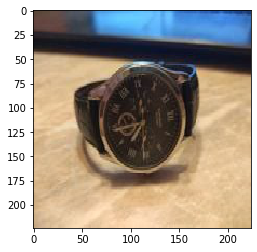

Пример данных


In [12]:
original = load_img(files[23], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("Пример данных")

In [13]:
img_featuresAlex = modelAlex.forward(transform(original).unsqueeze(0))
print("Извлечены признаки одного изображения")
print("Количество признаков:", len(img_featuresAlex[0]))

Извлечены признаки одного изображения
Количество признаков: 4096


In [14]:
dataset=transform(load_img(files[0], target_size=(224, 224))).unsqueeze(0)
col=0
for filename in files[1:]:
    original = transform(load_img(filename, target_size=(224, 224))).unsqueeze(0)
    col+=1
    print(col)
    dataset=torch.cat([dataset, original], dim=0) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [15]:
dataset.shape

torch.Size([1500, 3, 224, 224])

In [16]:
Alex_imgs_features = modelAlex.forward(dataset)
print("Признаки извлечены")

Признаки извлечены


In [17]:
print("Извлечено", Alex_imgs_features.shape[1], "признаков для каждого из", Alex_imgs_features.shape[0], "изображений.")

Извлечено 4096 признаков для каждого из 1500 изображений.


In [21]:
a = Alex_imgs_features.detach().numpy()
np.savetxt("features.csv", a, delimiter=",")

In [92]:
Alex_cosSimilarities = cosine_similarity(Alex_imgs_features.detach().numpy())
# загрузим матрицу релевантности товаров в pandas df
Alex_cos_similarities_df = pd.DataFrame(Alex_cosSimilarities, columns=files, index=files)
Alex_cos_similarities_df.head()

,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image1.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image10.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image100.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image1000.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image1001.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image1002.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image1003.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image1004.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image1005.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image1006.jpg,...,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image234.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image2340.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image2341.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image2342.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image2343.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image2344.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image2345.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image2346.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image2347.jpg,C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image2348.jpg
C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image1.jpg,1.000000,0.586874,0.722165,0.659187,0.755141,0.813182,0.743180,0.795976,0.710734,0.735374,...,0.677985,0.838842,0.748887,0.803640,0.747862,0.778971,0.715690,0.734078,0.791421,0.786157
C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image10.jpg,0.586874,1.000000,0.674407,0.507170,0.579545,0.691454,0.679604,0.682282,0.626106,0.557326,...,0.676094,0.668796,0.553705,0.641160,0.670110,0.781310,0.417124,0.660372,0.545601,0.568428
C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image100.jpg,0.722165,0.674407,1.000000,0.663069,0.686964,0.687415,0.652524,0.784958,0.680416,0.766395,...,0.658059,0.748711,0.589853,0.740201,0.715749,0.795622,0.581089,0.658019,0.656840,0.599238
C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image1000.jpg,0.659187,0.507170,0.663069,1.000000,0.648823,0.621886,0.645361,0.638740,0.662159,0.714485,...,0.625742,0.627116,0.682705,0.678725,0.602289,0.662948,0.685921,0.590746,0.678360,0.669242
C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/data_4k/image1001.jpg,0.755141,0.579545,0.686964,0.648823,1.000000,0.746264,0.686841,0.734265,0.657937,0.758298,...,0.737987,0.686307,0.740832,0.689011,0.697526,0.785292,0.749143,0.696886,0.734578,0.722503


# Данные парсинга

In [68]:
data = pd.read_csv("avito_4k.csv", encoding = 'cp1251',delimiter=';', error_bad_lines=False,header= None) 
data.columns = ['Title', 'Price', 'City', 'Link','ImagePath']

In [69]:
data

,Title,Price,City,Link,ImagePath
0,Наручные часы dkny в Москве,1000,Москва,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,data/image1.jpg
1,Часы наручные механические в Красном Селе,250,"Санкт-Петербург, Красное Село",https://www.avito.ru/sankt-peterburg_krasnoye_...,data/image2.jpg
2,Наручные часы в Москве,9600,Москва,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,data/image3.jpg
3,Наручные часы Fredericque Constant Geneve Clas...,17900,Москва,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,data/image4.jpg
4,Наручные часы dior в Москве,1200,Москва,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,data/image5.jpg
...,...,...,...,...,...
4160,Наручные часы casio W-753-2A в Самаре,2000,"Самарская область, Самара",https://www.avito.ru/samara/chasy_i_ukrasheniy...,data/image4161.jpg
4161,Часы Мужские. Мужские наручные часы в Москве,1500,Москва,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,data/image4162.jpg
4162,Наручные часы g-shock в Москве,1500,Москва,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,data/image4163.jpg
4163,Часы наручные позолоченные СССР в Кинешме,1500,"Ивановская область, Кинешма",https://www.avito.ru/kineshma/chasy_i_ukrashen...,data/image4164.jpg


In [70]:
data['Price']=data['Price'].str.extract('(\d+)', expand=False).fillna(0).astype(float)

In [71]:
path='C:/Users/Admin/Desktop/Мага Машинка/Никитин/экз/'

In [72]:
data['ImagePath']=path+data['ImagePath'].str.replace('data','data_4k')

In [73]:
data

,Title,Price,City,Link,ImagePath
0,Наручные часы dkny в Москве,1000.0,Москва,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,C:/Users/Admin/Desktop/Мага Машинка/Никитин/эк...
1,Часы наручные механические в Красном Селе,250.0,"Санкт-Петербург, Красное Село",https://www.avito.ru/sankt-peterburg_krasnoye_...,C:/Users/Admin/Desktop/Мага Машинка/Никитин/эк...
2,Наручные часы в Москве,9600.0,Москва,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,C:/Users/Admin/Desktop/Мага Машинка/Никитин/эк...
3,Наручные часы Fredericque Constant Geneve Clas...,17900.0,Москва,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,C:/Users/Admin/Desktop/Мага Машинка/Никитин/эк...
4,Наручные часы dior в Москве,1200.0,Москва,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,C:/Users/Admin/Desktop/Мага Машинка/Никитин/эк...
...,...,...,...,...,...
4160,Наручные часы casio W-753-2A в Самаре,2000.0,"Самарская область, Самара",https://www.avito.ru/samara/chasy_i_ukrasheniy...,C:/Users/Admin/Desktop/Мага Машинка/Никитин/эк...
4161,Часы Мужские. Мужские наручные часы в Москве,1500.0,Москва,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,C:/Users/Admin/Desktop/Мага Машинка/Никитин/эк...
4162,Наручные часы g-shock в Москве,1500.0,Москва,https://www.avito.ru/moskva/chasy_i_ukrasheniy...,C:/Users/Admin/Desktop/Мага Машинка/Никитин/эк...
4163,Часы наручные позолоченные СССР в Кинешме,1500.0,"Ивановская область, Кинешма",https://www.avito.ru/kineshma/chasy_i_ukrashen...,C:/Users/Admin/Desktop/Мага Машинка/Никитин/эк...


# Поиск просто похожих товаров

In [90]:
# функция подбора 4 релевантных товаров на основе выбранного

def Alex_retrieve_relevant_products(given_img,nb_closest_images = 4):
    print("     Выбранный товар")
    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()
    print("    _____________________________")
    print("    Релевантные товары")
    closest_imgs = Alex_cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = 100*Alex_cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]
    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        imagedata=data[data['ImagePath']==closest_imgs[i]]
        plt.imshow(original)
        plt.show()
        print("     Название:  ", str(imagedata['Title'].values[0]))
        print("     Ссылка:  ", str(imagedata['Link'].values[0]))
        print("     Схожесть: ", 
              #closest_imgs[i],
              round(closest_imgs_scores[i],2), "%")
        print("     Цена:  ", int(imagedata['Price']))

     Выбранный товар


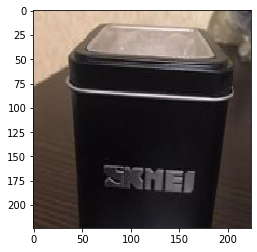

    _____________________________
    Релевантные товары


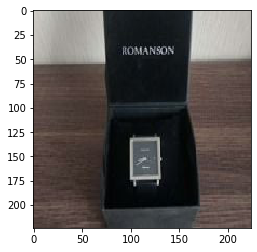

     Название:   Часы наручные Romanson DL2133S MW в Ставрополе
     Ссылка:   https://www.avito.ru/stavropol/chasy_i_ukrasheniya/chasy_naruchnye_romanson_dl2133s_mw_2099524800?slocation=621540
     Схожесть:  82.13 %
     Цена:   2000


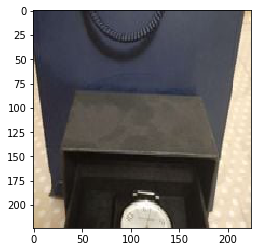

     Название:   Мужские наручные часы механические в Старой Купавне
     Ссылка:   https://www.avito.ru/staraya_kupavna/chasy_i_ukrasheniya/muzhskie_naruchnye_chasy_mehanicheskie_2109767726?slocation=621540
     Схожесть:  81.72 %
     Цена:   4500


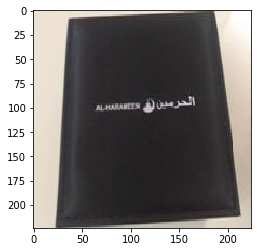

     Название:   Мужские наручные часы новые AL-harameen в Нальчике
     Ссылка:   https://www.avito.ru/nalchik/chasy_i_ukrasheniya/muzhskie_naruchnye_chasy_novye_al-harameen_2127892058?slocation=621540
     Схожесть:  80.7 %
     Цена:   6500


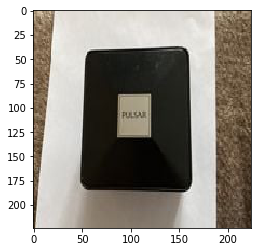

     Название:   Мужские наручные часы в Чите
     Ссылка:   https://www.avito.ru/chita/chasy_i_ukrasheniya/muzhskie_naruchnye_chasy_2147931721?slocation=621540
     Схожесть:  80.36 %
     Цена:   2000


In [97]:
Alex_retrieve_relevant_products(files[189])

# Поиск похожих товаров по условию изменения цены

При price_use=0, цена не учитывается

При price_use=1 поиск идет по товаром с ценой не больше  (цена начального товара * price_mult)


In [95]:
# функция подбора 4 релевантных товаров на основе выбранного

def Alex_retrieve_relevant_products_priced(given_img,price_use=0,price_mult=1,nb_closest_images = 4):
    print("     Выбранный товар")
    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    imagedata=data[data['ImagePath']==given_img]
    
    plt.imshow(original)
    plt.show()
    print("     Название:  ", str(imagedata['Title'].values[0]))
    print("     Ссылка:  ", str(imagedata['Link'].values[0]))
    print("     Цена:  ", int(imagedata['Price']))
    print("    _____________________________")
    print("    Релевантные товары")
    if price_use==0:
        closest_imgs = Alex_cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
        closest_imgs_scores = 100*Alex_cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]
    else:
        price=data[data['ImagePath']==given_img]['Price']
        priced=data[data['Price']<=float(price*price_mult)]['ImagePath']
        sim =Alex_cos_similarities_df[given_img][priced].sort_values(ascending=False)[1:nb_closest_images+1]
        closest_imgs =sim.index
        closest_imgs_scores = 100*sim
    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        imagedata=data[data['ImagePath']==closest_imgs[i]]
        plt.imshow(original)
        plt.show()
        print("     Название:  ", str(imagedata['Title'].values[0]))
        print("     Ссылка:  ", str(imagedata['Link'].values[0]))
        print("     Схожесть: ", 
              #closest_imgs[i],
              round(closest_imgs_scores[i],2), "%")
        print("     Цена:  ", int(imagedata['Price']))

     Выбранный товар


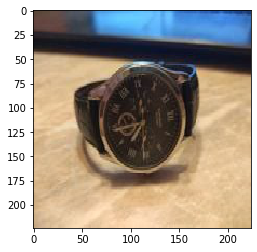

     Название:   Мужские наручные часы casio в Москве
     Ссылка:   https://www.avito.ru/moskva/chasy_i_ukrasheniya/muzhskie_naruchnye_chasy_casio_2123484674?slocation=621540
     Цена:   3000
    _____________________________
    Релевантные товары


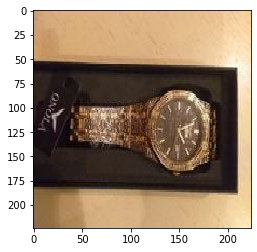

     Название:   Мужские наручные часы механические в ЛМС
     Ссылка:   https://www.avito.ru/lms/chasy_i_ukrasheniya/muzhskie_naruchnye_chasy_mehanicheskie_2109974501
     Схожесть:  82.29 %
     Цена:   900


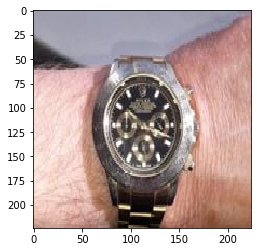

     Название:   Мужские механические наручные часы в Санкт-Петербурге
     Ссылка:   https://www.avito.ru/sankt-peterburg/chasy_i_ukrasheniya/muzhskie_mehanicheskie_naruchnye_chasy_2127474896?slocation=621540
     Схожесть:  82.23 %
     Цена:   1200


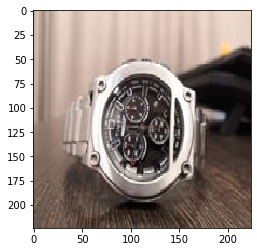

     Название:   Часы наручные timex в Набережных Челнах
     Ссылка:   https://www.avito.ru/naberezhnye_chelny/chasy_i_ukrasheniya/chasy_naruchnye_timex_2170107292?slocation=621540
     Схожесть:  82.16 %
     Цена:   8000


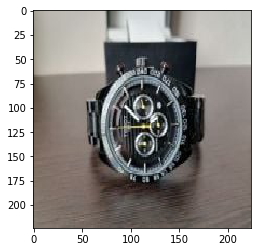

     Название:   Часы. Часы мужские. Часы наручные в Ставрополе
     Ссылка:   https://www.avito.ru/stavropol/chasy_i_ukrasheniya/chasy._chasy_muzhskie._chasy_naruchnye_2186024544?slocation=621540
     Схожесть:  81.97 %
     Цена:   2990


In [99]:
Alex_retrieve_relevant_products_priced(files[23])

In [179]:
# Возможно стоит доделать еще поиск для новых картинок (сторонних), но пока не дошли руки

In [100]:
def relevant_new(given_img,price_limit=0,nb_closest_images = 4):
    print("     Выбранное изображение")
    example = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    
    plt.imshow(example)
    plt.show()
    print("    _____________________________")
    print("    Релевантные товары дешевле "+str(price_limit)+' рублей')
    img_featuresAlex = modelAlex.forward(transform(example).unsqueeze(0))
    my_data = genfromtxt('features.csv', delimiter=',')
    ex_cosSimilarities = cosine_similarity(img_featuresAlex.detach().numpy(),my_data)
    # загрузим матрицу релевантности товаров в pandas df
    ex_cos_similarities_df = pd.DataFrame(ex_cosSimilarities, columns=files, index=['example'])
    if price_limit==0:
        closest_imgs =ex_cos_similarities_df.iloc[0].sort_values(ascending=False,axis=0)[1:nb_closest_images+1].index
        closest_imgs_scores = 100*ex_cos_similarities_df.iloc[0].sort_values(ascending=False)[1:nb_closest_images+1].values
    else:
        price=data[data['ImagePath']==given_img]['Price']
        priced=data[data['Price']<=float(price_limit)]['ImagePath']
        sim =ex_cos_similarities_df.iloc[0][priced].sort_values(ascending=False)[1:nb_closest_images+1]
        closest_imgs =sim.index
        closest_imgs_scores = 100*sim
    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        imagedata=data[data['ImagePath']==closest_imgs[i]]
        plt.imshow(original)
        plt.show()
        print("     Название:  ", str(imagedata['Title'].values[0]))
        print("     Ссылка:  ", str(imagedata['Link'].values[0]))
        print("     Схожесть: ", 
              #closest_imgs[i],
              round(closest_imgs_scores[i],2), "%")
        print("     Цена:  ", int(imagedata['Price']))

     Выбранное изображение


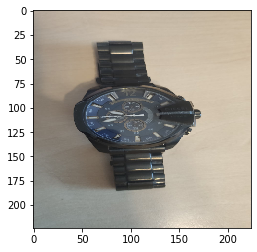

    _____________________________
    Релевантные товары дешевле 10000 рублей


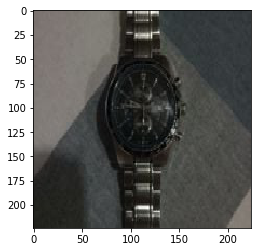

     Название:   Часы в Санкт-Петербурге
     Ссылка:   https://www.avito.ru/sankt-peterburg/chasy_i_ukrasheniya/chasy_1791141882
     Схожесть:  84.96 %
     Цена:   3000


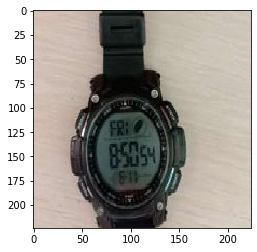

     Название:   Мужские наручные часы в Городище
     Ссылка:   https://www.avito.ru/volgogradskaya_oblast_gorodische/chasy_i_ukrasheniya/muzhskie_naruchnye_chasy_2159122317?slocation=621540
     Схожесть:  83.64 %
     Цена:   1000


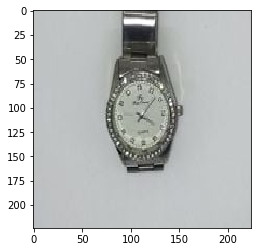

     Название:   Часы наручные в Туле
     Ссылка:   https://www.avito.ru/tula/chasy_i_ukrasheniya/chasy_naruchnye_1765106086
     Схожесть:  83.18 %
     Цена:   200


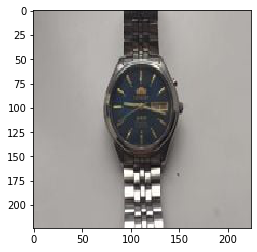

     Название:   Мужские наручные часы в Дербенте
     Ссылка:   https://www.avito.ru/derbent/chasy_i_ukrasheniya/muzhskie_naruchnye_chasy_2113279088
     Схожесть:  82.89 %
     Цена:   10000


In [101]:
relevant_new("example.jpg",10000)

     Выбранное изображение


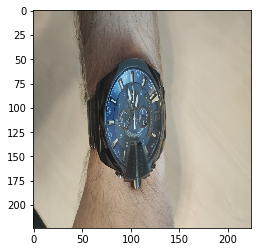

    _____________________________
    Релевантные товары дешевле 3000 рублей


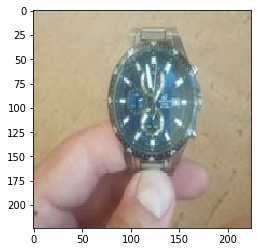

     Название:   Мужские наручные часы casio в Омске
     Ссылка:   https://www.avito.ru/omsk/chasy_i_ukrasheniya/muzhskie_naruchnye_chasy_casio_2168181799
     Схожесть:  83.39 %
     Цена:   3000


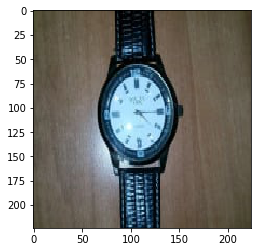

     Название:   Часы наручные в Белгороде
     Ссылка:   https://www.avito.ru/belgorod/chasy_i_ukrasheniya/chasy_naruchnye_1042972730?slocation=621540
     Схожесть:  82.4 %
     Цена:   200


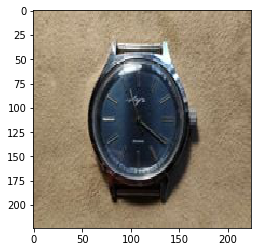

     Название:   Мужские наручные часы механические СССР в Москве
     Ссылка:   https://www.avito.ru/moskva/chasy_i_ukrasheniya/muzhskie_naruchnye_chasy_mehanicheskie_sssr_2111673826?slocation=621540
     Схожесть:  82.31 %
     Цена:   1500


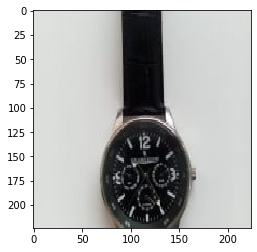

     Название:   Часы наручные vuilmin regnier в Санкт-Петербурге
     Ссылка:   https://www.avito.ru/sankt-peterburg/chasy_i_ukrasheniya/chasy_naruchnye_vuilmin_regnier_1676962780
     Схожесть:  82.28 %
     Цена:   0


In [102]:
relevant_new("example_on_hand.jpg",3000)